In [1]:
import pandas as pd
import numpy as np


In [2]:
df1 = pd.read_csv('C:\Singapore_resale\ResaleFlatPricesBasedonApprovalDate19901999.csv')
df2 = pd.read_csv('C:\Singapore_resale\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df3 = pd.read_csv('C:\Singapore_resale\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
df4 = pd.read_csv('C:\Singapore_resale\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
df5 = pd.read_csv('C:\Singapore_resale\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [3]:
df=pd.concat([df1,df2,df3,df4,df5])
df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
5,1990-01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,46000.0,NaN
6,1990-01,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,07 TO 09,67.0,NEW GENERATION,1977,42000.0,NaN
7,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,10 TO 12,67.0,NEW GENERATION,1977,38000.0,NaN
8,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,04 TO 06,67.0,NEW GENERATION,1977,40000.0,NaN
9,1990-01,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,47000.0,NaN


In [4]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [5]:
#removing remaining lease bcoz there are lots of null values
df=df.drop(["remaining_lease"],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912986 entries, 0 to 166782
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                912986 non-null  object 
 1   town                 912986 non-null  object 
 2   flat_type            912986 non-null  object 
 3   block                912986 non-null  object 
 4   street_name          912986 non-null  object 
 5   storey_range         912986 non-null  object 
 6   floor_area_sqm       912986 non-null  float64
 7   flat_model           912986 non-null  object 
 8   lease_commence_date  912986 non-null  int64  
 9   resale_price         912986 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 76.6+ MB


In [7]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [8]:
df.nunique()

month                   407
town                     27
flat_type                 8
block                  2695
street_name             583
storey_range             25
floor_area_sqm          210
flat_model               34
lease_commence_date      56
resale_price           9326
dtype: int64

In [9]:
df["year"]=df["month"].apply(lambda x:(x[0:4]))                   #extracted year
df["months"]=df["month"].apply(lambda x:(x[5:7]))                   #extracted month

In [10]:
df["months"]=df["months"].astype('int64')
df["year"]=df["year"].astype("int64")

In [11]:
df=df.drop(['month'],axis=1)                          #dropping the original column after extracting year and month

In [12]:
df.select_dtypes(["object"]).columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model'],
      dtype='object')

In [13]:
town=[]
for i in (df["town"].unique()):
    town.append(i)
print(town)
len(town)

['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN', 'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS', 'PUNGGOL']


27

In [14]:
flat_type=[]
for i in (df["flat_type"].unique()):
    flat_type.append(i)
print(flat_type)

['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', 'MULTI GENERATION', 'MULTI-GENERATION']


In [15]:
storey_range=[]
for i in (df["storey_range"].unique()):
    storey_range.append(i)
print(storey_range)

['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15', '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30', '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10', '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51']


In [16]:
flat_model=[]
for i in (df["flat_model"].unique()):
    flat_model.append(i)
print(flat_model)
print(len(flat_model))

['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED', 'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE', '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION', 'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A', 'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette', 'Maisonette', 'Multi Generation', 'Adjoined flat', 'Premium Apartment', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1', 'Type S2', 'Premium Apartment Loft', '3Gen']
34


In [17]:
#dropping the columns as there are more unique values
df=df.drop(['block','street_name'],axis=1)

In [18]:
#replacing the values that are type incorrectly
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Improved","IMPROVED"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("New Generation","NEW GENERATION"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Model A","MODEL A"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Standard","STANDARD"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Apartment","APARTMENT"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Simplified","SIMPLIFIED"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Maisonette","MAISONETTE"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Multi Generation","MULTI GENERATION"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Premium Apartment","PREMIUM APARTMENT"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Terrace","TERRACE"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Improved-Maisonette","IMPROVED-MAISONETTE"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("2-room","2-ROOM"))

In [19]:
#converting to csv file to use it later in app development
df.to_csv("singapore.csv",index=False)

In [20]:
#encoding the categorical column Storey Range and Flat Type
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
df["storey_range"]=encoder.fit_transform(df[["storey_range"]])
df["flat_type"]=encoder.fit_transform(df[["flat_type"]])

In [21]:
#just for finding out the correlation between the features var and target var taking a new dataframe
df1=df.iloc[:,[1,2,3,5,6,7,8]]

<Axes: >

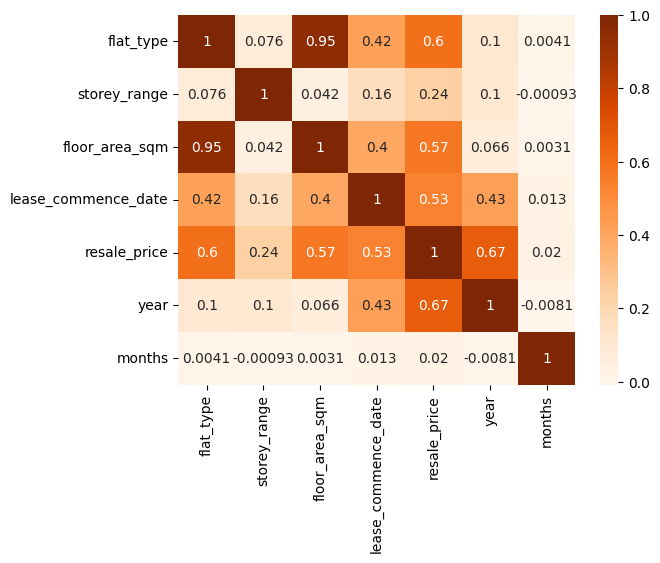

In [22]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True,cmap="Oranges")

In [23]:
#checking the skewness
from scipy import stats
df1.skew()

flat_type              0.401482
storey_range           1.092950
floor_area_sqm         0.367743
lease_commence_date    0.626052
resale_price           0.921650
year                   0.295842
months                -0.044142
dtype: float64

In [24]:
#encoding the categorical column flat model and town
from sklearn.preprocessing import OneHotEncoder
ohe_t=OneHotEncoder()
ohe_t.fit(df[["town"]])
ohe1=ohe_t.fit_transform(df[["town"]]).toarray()
ohe_m=OneHotEncoder()
ohe_m.fit(df[["flat_model"]])
ohe2=ohe_m.fit_transform(df[["flat_model"]]).toarray()

In [25]:
df.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'year', 'months'],
      dtype='object')

In [26]:
#not including months and flat_type bcoz flat_type & floor area serves the same purpose as well as avoiding the problem of multicollinearity
x=(df[["storey_range","floor_area_sqm","lease_commence_date","year","town","flat_model"]]) 

In [27]:
#independent features
X=np.concatenate((x[["storey_range","floor_area_sqm","lease_commence_date","year"]].values,ohe1,ohe2),axis=1)

In [28]:
#target variable
y=df["resale_price"]

In [29]:
#scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
#splitting the data into training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)

In [31]:
#Fitting the regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:",r2_score(y_test,y_pred))
print('The RMSE score of model is:',mean_squared_error(y_test, y_pred, squared=False))

Training Accuracy: 0.8307601000555931
Testing Accuracy: 0.8310612825926205
The RMSE score of model is: 68661.07900063778


In [32]:
#cross validating the linear regression model
from sklearn.model_selection import cross_val_score
print(cross_val_score(model,X_train,y_train,cv=10))

[0.83050366 0.83157493 0.83002784 0.82857356 0.82969306 0.83147116
 0.83077081 0.83017885 0.83123672 0.8331011 ]


In [33]:
#Fitting the Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print('Training Accuracy:',dtr.score(X_train, y_train))
print('Testing Accuracy:',r2_score(y_test, y_pred))
print('The RMSE score of model is:',mean_squared_error(y_test, y_pred, squared=False))

Training Accuracy: 0.9908242128116654
Testing Accuracy: 0.9662102368380375
The RMSE score of model is: 30707.08573589779


In [34]:
#cross validating the decision tree regression model
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtr,X_train,y_train,cv=10))

[0.96571355 0.96622559 0.96529414 0.96533237 0.96574105 0.96589861
 0.96462101 0.96501286 0.96595872 0.96630723]


In [35]:
#Fitting the RFR Model
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=10)
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
print('Training Accuracy:',RFR.score(X_train, y_train))
print('Testing_Accuracy:',r2_score(y_test,y_pred))
print('The RMSE score of model is:',mean_squared_error(y_test, y_pred, squared=False))

Training Accuracy: 0.988631944006867
Testing_Accuracy: 0.9732566382542049
The RMSE score of model is: 27318.322465560133


In [ ]:
#cross validating the Random forest regression model
from sklearn.model_selection import cross_val_score
print(cross_val_score(RFR,X_train,y_train,cv=10))

In [ ]:
#Fitting the XGBOOST Regression Model
from xgboost import XGBRegressor
from sklearn import metrics
XGBModel=XGBRegressor(learning_rate=0.1, n_estimators=100, objective='reg:squarederror', booster='gbtree')
XGBModel.fit(X_train,y_train)
y_pred=XGBModel.predict(X_test)
print('Training accuracy:',metrics.r2_score(y_train, XGBModel.predict(X_train)))
print('Testing accuracy:',metrics.r2_score(y_test,y_pred))
print('The RMSE score of model is ',mean_squared_error(y_test,y_pred,squared=False))

In [ ]:
#Predicting Flat Resale price on a new input with different models
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names, but OneHotEncoder was fitted with feature names", category=UserWarning)
new_input = np.array([["04 TO 06",73.0,"1976","2010","BEDOK","IMPROVED"]])
ordinal_encoded = encoder.fit_transform(new_input[:, [0]])
new_sample_ohe1 = ohe_t.transform(new_input[:, [4]]).toarray()
new_sample_ohe2 = ohe_m.transform(new_input[:, [5]]).toarray()
new_input_concatenated = np.concatenate((ordinal_encoded, new_input[:, [1, 2, 3]], new_sample_ohe1, new_sample_ohe2), axis=1)
new_sample1 = scaler.transform(new_input_concatenated)
new_pred= model.predict(new_sample1)
predicted_price= round(float(new_pred[0]), 4)
print('Predicted price using LR Model: {}'.format(predicted_price))
new_pred1 = dtr.predict(new_sample1)
predicted_price1 = round(float(new_pred1[0]), 4)
print('Predicted price using DT Model: {}'.format(predicted_price1))
new_pred2= RFR.predict(new_sample1)
predicted_price2 = round(float(new_pred2[0]), 4)
print('Predicted price using Random Forest: {}'.format(predicted_price2))
new_pred3= XGBModel.predict(new_sample1)
predicted_price3 = round(float(new_pred3[0]), 4)
print('Predicted price using XGBoost: {}'.format(predicted_price3))
new_pred4= model.predict(new_sample1)
predicted_price4= round(float(new_pred4[0]), 4)
print('Predicted price using XGBoost: {}'.format(predicted_price4))

In [ ]:
#saving the best model using pickling
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(RFR, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('storey_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
with open('town_encoder.pkl', 'wb') as f:
    pickle.dump(ohe_t, f)
with open('flat_model_enc.pkl', 'wb') as f:
    pickle.dump(ohe_m, f)